In [38]:
import pandas as pd

df = pd.read_csv('2025-01-16(in).csv')

# Drop rows where the speed is less than 1
df = df[df['directSpeed'] >= 1]

# Define the quarter mile in meters
quarter_mile = 402.336

# Create bins for cumulative distance
df['quarter_mile_bin'] = (df['sumDistance'] // quarter_mile).astype(int)

# Group by the quarter-mile bins and calculate mean and standard deviation
result = df.groupby('quarter_mile_bin').agg(
    {
        'directSpeed': ['mean', 'std'],
        'directPower': ['mean', 'std'],
        'directFractionalCadence': ['mean', 'std'],
        'directHeartRate': ['mean', 'std'],
        'directBodyBattery': ['mean', 'std'],
        'directRunCadence': ['mean', 'std'],
        'directVerticalOscillation': ['mean', 'std'],
        'directGroundContactTime': ['mean', 'std']
    }
).reset_index()

# Flatten multi-level columns into their own column
result.columns = ['_'.join(col).strip('_') for col in result.columns]

print(result)

    quarter_mile_bin  directSpeed_mean  directSpeed_std  directPower_mean  \
0                  0          2.795662         0.396081        230.070423   
1                  1          3.185855         0.091188        220.064516   
2                  2          3.311339         0.052349        253.790323   
3                  3          3.145923         0.139754        248.046154   
4                  4          3.246524         0.067944        227.904762   
5                  5          3.061591         0.098954        265.212121   
6                  6          3.276556         0.091389        273.825397   
7                  7          3.140397         0.021279        245.841270   
8                  8          3.160875         0.230649        237.571429   
9                  9          3.196078         0.029238        265.453125   
10                10          3.336000         0.128006        254.862069   
11                11          3.389590         0.098805        246.803279   

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data
X = result[['directPower_mean', 'directFractionalCadence_mean', 'directHeartRate_mean',
            'directBodyBattery_mean', 'directRunCadence_mean', 'directVerticalOscillation_mean',
            'directGroundContactTime_mean']]
y = result['directSpeed_mean']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a linear model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model Evalutation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.004109584523748808
R-squared: 0.9188831708640223


In [40]:
# Getting the coefficients
coefficients = model.coef_
intercept = model.intercept_

for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')
print(f'Intercept: {intercept}')

directPower_mean: -7.828658853863001e-05
directFractionalCadence_mean: 0.03970144237775773
directHeartRate_mean: 0.0002531653885518813
directBodyBattery_mean: 0.0020472732432167077
directRunCadence_mean: 0.009620743151353577
directVerticalOscillation_mean: 0.2938154538471692
directGroundContactTime_mean: -0.022019472565147996
Intercept: 4.948234400222864


Mean Squared Error: 0.02364987251386381
R-squared: 0.5331881710405215


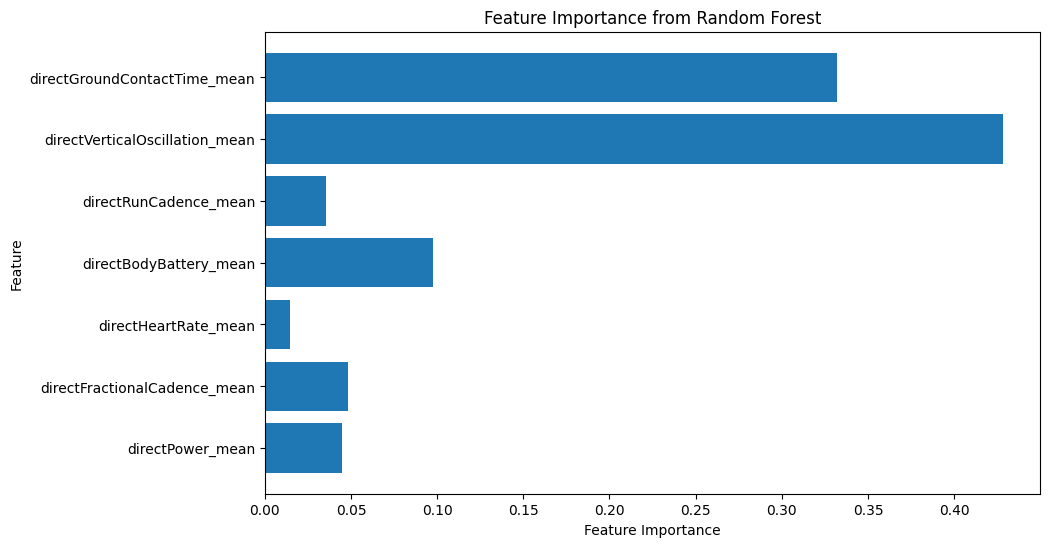

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculating feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()